<a href="https://colab.research.google.com/github/edx04/my-travel-plans/blob/master/CNN_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model

import random

In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [72]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [0]:
num_of_samples=[]

In [0]:
cols = 5
num_classes = 10



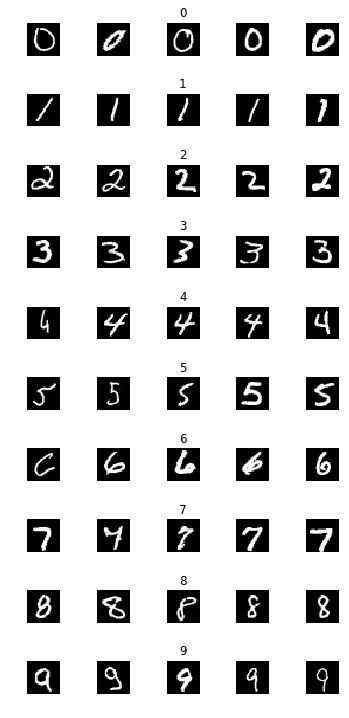

In [76]:
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


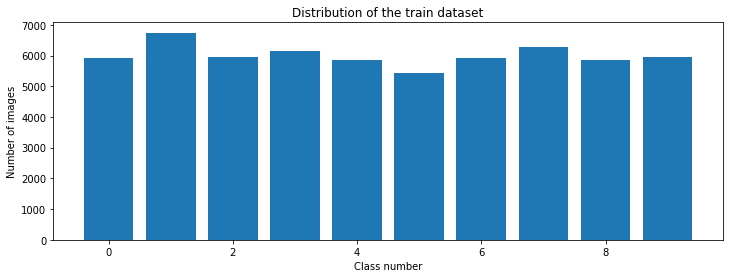

In [77]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:

X_train = X_train/255
X_test = X_test/255


In [0]:
def Net_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape =(28,28,1),activation='relu' ))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr = 0.01),loss = 'categorical_crossentropy',metrics =['accuracy'])
  return model
    

In [82]:
model= Net_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
Total para

In [86]:
history=model.fit(X_train, y_train, epochs=6,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 31s 571us/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0363 - val_acc: 0.9897
Epoch 2/6
54000/54000 [==============================] - 31s 578us/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0387 - val_acc: 0.9888
Epoch 3/6
54000/54000 [==============================] - 32s 589us/step - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0568 - val_acc: 0.9857
Epoch 4/6
54000/54000 [==============================] - 31s 583us/step - loss: 0.0195 - acc: 0.9936 - val_loss: 0.0423 - val_acc: 0.9910
Epoch 5/6
54000/54000 [==============================] - 31s 581us/step - loss: 0.0157 - acc: 0.9947 - val_loss: 0.0434 - val_acc: 0.9913
Epoch 6/6
54000/54000 [==============================] - 31s 582us/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.0515 - val_acc: 0.9878


Text(0.5, 0, 'epoch')

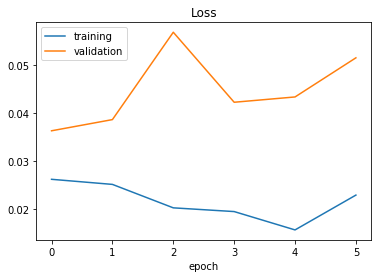

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

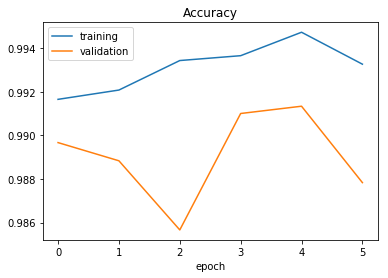

In [88]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [90]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.05494733569157606
Test accuracy: 0.9873


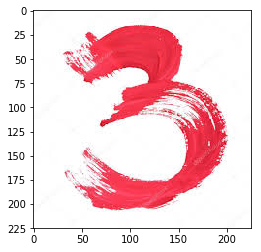

In [91]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

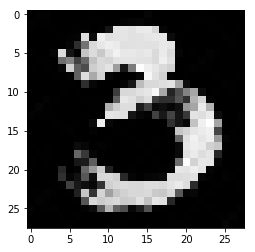

In [92]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [93]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [94]:
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 28, 28, 1)
predicted digit: [3]


In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [0]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

In [103]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


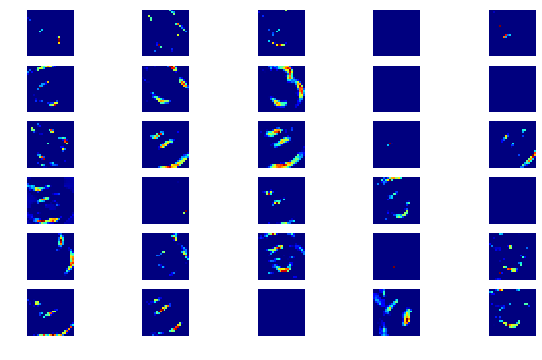

In [104]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')